In [ ]:
#Reading and preparing the dataset
import numpy as np
import pandas as pd
dataset = pd.read_csv("/content/iris.csv")
from sklearn.preprocessing import StandardScaler
print(dataset.head(10)) #Return 10 rows of data

#Separating the features and labels
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

   Index  sepallength  sepalwidth  petallength  petalwidth        class
0      0          5.1         3.5          1.4         0.2  Iris-setosa
1      1          4.9         3.0          1.4         0.2  Iris-setosa
2      2          4.7         3.2          1.3         0.2  Iris-setosa
3      3          4.6         3.1          1.5         0.2  Iris-setosa
4      4          5.0         3.6          1.4         0.2  Iris-setosa
5      5          5.4         3.9          1.7         0.4  Iris-setosa
6      6          4.6         3.4          1.4         0.3  Iris-setosa
7      7          5.0         3.4          1.5         0.2  Iris-setosa
8      8          4.4         2.9          1.4         0.2  Iris-setosa
9      9          4.9         3.1          1.5         0.1  Iris-setosa


In [ ]:
#performing one hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
y_ids=label_encoder.fit_transform(y)#transforming the text labels to integer lables
#print(y_ids)
one = OneHotEncoder()
y_ids=y_ids.reshape(-1,1)
y_oh = one.fit_transform(y_ids).toarray()#transforming to one hot encoded labels
#print(y_oh)

In [ ]:
#preparing training testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_oh,test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

4 3
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 12)                204       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_26 (Dense)            (None, 3)                 39        
                                                                 
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________
None


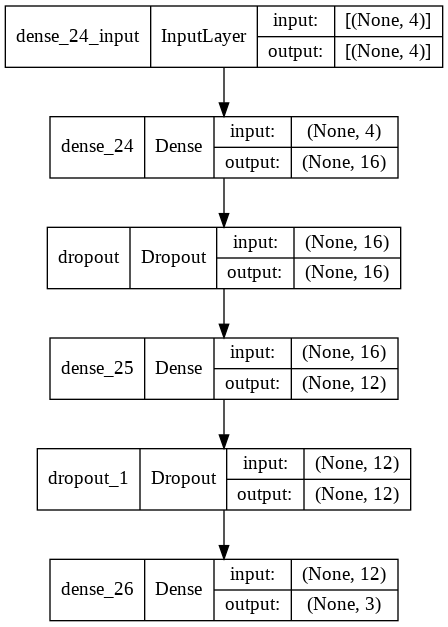

In [ ]:
#Preparing the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
input=len(X_train[0,:]) #dimension of the input
output=len(y_oh[0,:]) #dimension of the output
print(input,output)
# Neural network
model = Sequential()
#model.add used to add layers to the neural network
model.add(Dense(16, input_dim=input, activation="relu")) #hidden layer 1
model.add(Dropout(0.2))
model.add(Dense(12, activation="relu"))#hidden layer 2
model.add(Dropout(0.2))
model.add(Dense(output, activation="softmax"))#ouput layer

#compiling the model details
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())#summarize model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #visulaize the model

In [ ]:
#trainning the model
history = model.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=100, batch_size=10,verbose=0)

Epoch 1/100
9/9 - 0s - loss: 0.0464 - accuracy: 0.9778 - val_loss: 0.1966 - val_accuracy: 0.9667 - 137ms/epoch - 15ms/step
Epoch 2/100
9/9 - 0s - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.1989 - val_accuracy: 0.9667 - 67ms/epoch - 7ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.1986 - val_accuracy: 0.9667 - 116ms/epoch - 13ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.1944 - val_accuracy: 0.9667 - 178ms/epoch - 20ms/step
Epoch 5/100
9/9 - 0s - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.1939 - val_accuracy: 0.9667 - 90ms/epoch - 10ms/step
Epoch 6/100
9/9 - 0s - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.1948 - val_accuracy: 0.9667 - 72ms/epoch - 8ms/step
Epoch 7/100
9/9 - 0s - loss: 0.0514 - accuracy: 0.9667 - val_loss: 0.1967 - val_accuracy: 0.9667 - 83ms/epoch - 9ms/step
Epoch 8/100
9/9 - 0s - loss: 0.0284 - accuracy: 0.9889 - val_loss: 0.1948 - val_accuracy: 0.9667 - 71ms/epoch - 8ms/step
Epoch 9/100
9/9 - 0s - lo

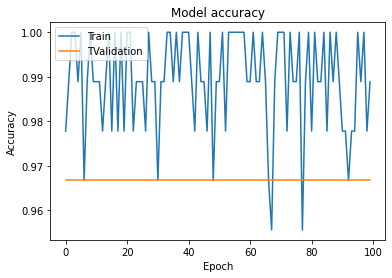

In [ ]:
#plotting trainning accuracy and validation acciracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'TValidation'], loc='upper left')
plt.show()

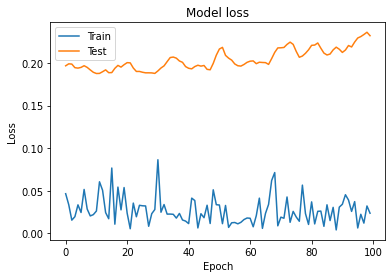

In [ ]:
#plotting trainning loss and validation loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

[[ 7  0  0]
 [ 0 13  0]
 [ 0  1  9]]
Accuracy :  96.66666666666667


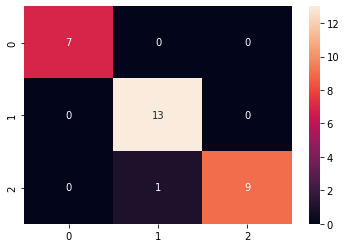

In [ ]:
#performance evaluation
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

#confusion matrix
cm = confusion_matrix(test, pred)
print(cm)
sns.heatmap(cm, annot=True)
#printing the accuracy
acc=accuracy_score(test, pred)
print ("Accuracy : ",acc*100 )
